In [ ]:
import pandas as pd
import pickle

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.model_selection import train_test_split

import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
# 0.1 load data from file
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving static_defenses_yards.csv to static_defenses_yards.csv
User uploaded file "static_defenses_yards.csv" with length 4999907 bytes


In [ ]:
static_defenses = pd.read_csv("static_defenses_yards.csv",index_col=0)
static_defenses

,id,defensivelinezonePlayers,deepzonePlayers,hookzonePlayers,curlzonePlayers,flatzonePlayers,defenseArea,defenseAreaCoverDefenders,width,height,numberQBs,numberWRs,numberTEs,numberRBs,numberFBs,numberOffensivePlayersAnotherPosition,numberSafeties,numberLBs,numberCBs,strongSide,numberPlayersDefenseStrongSide,numberPlayersDefenseWeakSide,numberPlayersOffenseStrongSide,numberPlayersOffenseWeakSide,differenceOffenseVsDefenseWidth,differenceOffenseVsDefenseStrongSide,differenceOffenseVsDefenseWeakSide,HeightByWeightDeep,HeightByWeightHook,HeightByWeightCurl,HeightByWeightFlat,WeightByArea,density,densityNoLine,densityInsidePoints,densityInsidePointsNoLine,playResult
0,2018090600:75:1,0,1,3,2,1,194.31095,194.31095,22.96,15.25,1,2,1,1,1,0,3,2,2,left,3,4,3,2,-0.63,0,-2,0.020227,0.018643,0.020066,0.021034,3.376032,0.036025,0.036025,6.974268,6.974268,10
1,2018090600:146:1,0,1,3,2,1,204.17725,204.17725,29.22,12.57,1,3,1,1,0,0,2,2,3,right,3,4,2,3,-1.15,-1,-1,0.020227,0.019228,0.020356,0.020455,3.178611,0.034284,0.034284,6.975511,6.975511,0
2,2018090600:168:1,0,1,2,2,2,277.65495,277.65495,33.67,15.21,1,2,1,2,0,0,2,2,3,left,5,2,4,1,0.71,-1,-1,0.020227,0.017683,0.020997,0.020745,2.337434,0.025211,0.025211,6.985594,6.985594,0
3,2018090600:190:1,1,0,2,3,1,189.16960,165.05520,26.42,12.91,1,3,1,1,0,0,3,1,3,right,2,5,2,3,-3.11,0,-2,0.000000,0.020120,0.021193,0.020455,3.192871,0.037004,0.036351,6.973569,6.969707,33
5,2018090600:320:1,1,0,3,3,1,187.12510,153.20020,27.80,13.29,1,3,1,1,0,0,2,3,3,left,3,5,3,2,-4.82,0,-3,0.000000,0.018995,0.019537,0.021279,4.281979,0.042752,0.045692,7.978624,7.980418,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19112,2018123015:3819:17,1,0,3,3,0,169.30945,124.90995,23.43,12.71,1,2,2,1,0,0,2,3,2,right,3,4,3,2,-3.91,0,-2,0.000000,0.017582,0.019208,0.000000,4.867507,0.041344,0.048035,6.970468,6.959971,12
19113,2018123015:3932:17,0,0,1,4,2,327.34785,327.34785,35.76,13.20,1,3,1,1,0,0,2,2,3,right,3,4,3,2,-0.97,0,-2,0.000000,0.016636,0.018979,0.019819,2.120069,0.021384,0.021384,6.987781,6.987781,-3
19114,2018123015:3969:17,0,1,1,4,1,293.39745,293.39745,26.24,14.67,1,3,1,1,0,0,2,1,4,left,3,4,2,3,0.07,-1,-1,0.018878,0.016636,0.019862,0.019789,2.307450,0.023858,0.023858,6.982958,6.982958,0
19115,2018123015:4057:17,0,0,2,3,2,223.81860,223.81860,36.23,11.62,1,3,1,1,0,0,3,2,2,right,3,4,2,3,-0.94,-1,-1,0.000000,0.019526,0.019136,0.020001,2.948817,0.031275,0.031275,6.982128,6.982128,5


In [ ]:
static_defenses_ss = pd.read_csv("static_defenses_ss_kmeans_without_outliers_yards.csv",index_col=0)
static_defenses_mms = pd.read_csv("static_defenses_mms_kmeans_without_outliers_yards.csv",index_col=0)
static_defenses_rs = pd.read_csv("static_defenses_rs_kmeans_without_outliers_yards.csv",index_col=0)
static_defenses_pt = pd.read_csv("static_defenses_pt_kmeans_without_outliers_yards.csv",index_col=0)
static_defenses_ss.head()

,defensivelinezonePlayers,deepzonePlayers,hookzonePlayers,curlzonePlayers,flatzonePlayers,defenseArea,defenseAreaCoverDefenders,width,height,numberQBs,numberWRs,numberTEs,numberRBs,numberFBs,numberOffensivePlayersAnotherPosition,numberSafeties,numberLBs,numberCBs,strongSide,numberPlayersDefenseStrongSide,numberPlayersDefenseWeakSide,numberPlayersOffenseStrongSide,numberPlayersOffenseWeakSide,differenceOffenseVsDefenseWidth,differenceOffenseVsDefenseStrongSide,differenceOffenseVsDefenseWeakSide,HeightByWeightDeep,HeightByWeightHook,HeightByWeightCurl,HeightByWeightFlat,WeightByArea,density,densityNoLine,densityInsidePoints,densityInsidePointsNoLine,cluster,playResult
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018090600:75:1,0,1,3,2,1,194.31095,194.31095,22.96,15.25,1,2,1,1,1,0,3,2,2,1,3,4,3,2,-0.63,0,-2,0.020227,0.018643,0.020066,0.021034,3.376032,0.036025,0.036025,6.974268,6.974268,2,10
2018090600:146:1,0,1,3,2,1,204.17725,204.17725,29.22,12.57,1,3,1,1,0,0,2,2,3,0,3,4,2,3,-1.15,-1,-1,0.020227,0.019228,0.020356,0.020455,3.178611,0.034284,0.034284,6.975511,6.975511,2,0
2018090600:168:1,0,1,2,2,2,277.65495,277.65495,33.67,15.21,1,2,1,2,0,0,2,2,3,1,5,2,4,1,0.71,-1,-1,0.020227,0.017683,0.020997,0.020745,2.337434,0.025211,0.025211,6.985594,6.985594,2,0
2018090600:190:1,1,0,2,3,1,189.16960,165.05520,26.42,12.91,1,3,1,1,0,0,3,1,3,0,2,5,2,3,-3.11,0,-2,0.000000,0.020120,0.021193,0.020455,3.192871,0.037004,0.036351,6.973569,6.969707,0,33
2018090600:320:1,1,0,3,3,1,187.12510,153.20020,27.80,13.29,1,3,1,1,0,0,2,3,3,1,3,5,3,2,-4.82,0,-3,0.000000,0.018995,0.019537,0.021279,4.281979,0.042752,0.045692,7.978624,7.980418,0,4


In [ ]:
static_defenses.replace({"right":0,"left":1},inplace=True)

#Cambiar valor playResult

Vamos a seguir el siguiente criterio:


*   Yardas negativas (-infinito,0)
*   Poco yardaje [0,3)
*   Yardaje medio [3,7)
*   Mucho yardaje [7,16)
*   Big play      [16, +infinito)



In [ ]:
def assignTag(number): 
  tag = ""
  if number < 0:
    tag = 0 #"negativeYards"
  elif number < 3:
    tag = 1 #"fewYards"
  elif number < 7:
    tag = 2 #"mediumYards"
  elif number < 16:
    tag = 3 #"muchYards"
  else:
    tag = 4 #"bigPlay"
  
  return tag

In [ ]:
static_defenses["playResult"] = static_defenses["playResult"].apply(assignTag)

In [ ]:
static_defenses_ss["playResult"] = static_defenses_ss["playResult"].apply(assignTag)
static_defenses_mms["playResult"] = static_defenses_mms["playResult"].apply(assignTag)
static_defenses_rs["playResult"] = static_defenses_rs["playResult"].apply(assignTag)
static_defenses_pt["playResult"] = static_defenses_pt["playResult"].apply(assignTag)

In [ ]:
static_defenses

,id,defensivelinezonePlayers,deepzonePlayers,hookzonePlayers,curlzonePlayers,flatzonePlayers,defenseArea,defenseAreaCoverDefenders,width,height,numberQBs,numberWRs,numberTEs,numberRBs,numberFBs,numberOffensivePlayersAnotherPosition,numberSafeties,numberLBs,numberCBs,strongSide,numberPlayersDefenseStrongSide,numberPlayersDefenseWeakSide,numberPlayersOffenseStrongSide,numberPlayersOffenseWeakSide,differenceOffenseVsDefenseWidth,differenceOffenseVsDefenseStrongSide,differenceOffenseVsDefenseWeakSide,HeightByWeightDeep,HeightByWeightHook,HeightByWeightCurl,HeightByWeightFlat,WeightByArea,density,densityNoLine,densityInsidePoints,densityInsidePointsNoLine,playResult
0,2018090600:75:1,0,1,3,2,1,194.31095,194.31095,22.96,15.25,1,2,1,1,1,0,3,2,2,1,3,4,3,2,-0.63,0,-2,0.020227,0.018643,0.020066,0.021034,3.376032,0.036025,0.036025,6.974268,6.974268,3
1,2018090600:146:1,0,1,3,2,1,204.17725,204.17725,29.22,12.57,1,3,1,1,0,0,2,2,3,0,3,4,2,3,-1.15,-1,-1,0.020227,0.019228,0.020356,0.020455,3.178611,0.034284,0.034284,6.975511,6.975511,1
2,2018090600:168:1,0,1,2,2,2,277.65495,277.65495,33.67,15.21,1,2,1,2,0,0,2,2,3,1,5,2,4,1,0.71,-1,-1,0.020227,0.017683,0.020997,0.020745,2.337434,0.025211,0.025211,6.985594,6.985594,1
3,2018090600:190:1,1,0,2,3,1,189.16960,165.05520,26.42,12.91,1,3,1,1,0,0,3,1,3,0,2,5,2,3,-3.11,0,-2,0.000000,0.020120,0.021193,0.020455,3.192871,0.037004,0.036351,6.973569,6.969707,4
5,2018090600:320:1,1,0,3,3,1,187.12510,153.20020,27.80,13.29,1,3,1,1,0,0,2,3,3,1,3,5,3,2,-4.82,0,-3,0.000000,0.018995,0.019537,0.021279,4.281979,0.042752,0.045692,7.978624,7.980418,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19112,2018123015:3819:17,1,0,3,3,0,169.30945,124.90995,23.43,12.71,1,2,2,1,0,0,2,3,2,0,3,4,3,2,-3.91,0,-2,0.000000,0.017582,0.019208,0.000000,4.867507,0.041344,0.048035,6.970468,6.959971,3
19113,2018123015:3932:17,0,0,1,4,2,327.34785,327.34785,35.76,13.20,1,3,1,1,0,0,2,2,3,0,3,4,3,2,-0.97,0,-2,0.000000,0.016636,0.018979,0.019819,2.120069,0.021384,0.021384,6.987781,6.987781,0
19114,2018123015:3969:17,0,1,1,4,1,293.39745,293.39745,26.24,14.67,1,3,1,1,0,0,2,1,4,1,3,4,2,3,0.07,-1,-1,0.018878,0.016636,0.019862,0.019789,2.307450,0.023858,0.023858,6.982958,6.982958,1
19115,2018123015:4057:17,0,0,2,3,2,223.81860,223.81860,36.23,11.62,1,3,1,1,0,0,3,2,2,0,3,4,2,3,-0.94,-1,-1,0.000000,0.019526,0.019136,0.020001,2.948817,0.031275,0.031275,6.982128,6.982128,2


#Añadir playResult

In [ ]:
def obtainYards(playId):
    return static_defenses[static_defenses["id"]==playId]["playResult"].values[0]

In [ ]:
static_defenses_ss["playResult"] = static_defenses_ss.index.map(obtainYards)
static_defenses_mms["playResult"] = static_defenses_mms.index.map(obtainYards)
static_defenses_rs["playResult"] = static_defenses_rs.index.map(obtainYards)
static_defenses_pt["playResult"] = static_defenses_pt.index.map(obtainYards)

In [ ]:
static_defenses_ss

,defensivelinezonePlayers,deepzonePlayers,hookzonePlayers,curlzonePlayers,flatzonePlayers,defenseArea,defenseAreaCoverDefenders,width,height,numberQBs,numberWRs,numberTEs,numberRBs,numberFBs,numberOffensivePlayersAnotherPosition,numberSafeties,numberLBs,numberCBs,strongSide,numberPlayersDefenseStrongSide,numberPlayersDefenseWeakSide,numberPlayersOffenseStrongSide,numberPlayersOffenseWeakSide,differenceOffenseVsDefenseWidth,differenceOffenseVsDefenseStrongSide,differenceOffenseVsDefenseWeakSide,HeightByWeightDeep,HeightByWeightHook,HeightByWeightCurl,HeightByWeightFlat,WeightByArea,density,densityNoLine,densityInsidePoints,densityInsidePointsNoLine,cluster,playResult
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018090600:75:1,0,1,3,2,1,194.31095,194.31095,22.96,15.25,1,2,1,1,1,0,3,2,2,1,3,4,3,2,-0.63,0,-2,0.020227,0.018643,0.020066,0.021034,3.376032,0.036025,0.036025,6.974268,6.974268,2,10
2018090600:146:1,0,1,3,2,1,204.17725,204.17725,29.22,12.57,1,3,1,1,0,0,2,2,3,0,3,4,2,3,-1.15,-1,-1,0.020227,0.019228,0.020356,0.020455,3.178611,0.034284,0.034284,6.975511,6.975511,2,0
2018090600:168:1,0,1,2,2,2,277.65495,277.65495,33.67,15.21,1,2,1,2,0,0,2,2,3,1,5,2,4,1,0.71,-1,-1,0.020227,0.017683,0.020997,0.020745,2.337434,0.025211,0.025211,6.985594,6.985594,2,0
2018090600:190:1,1,0,2,3,1,189.16960,165.05520,26.42,12.91,1,3,1,1,0,0,3,1,3,0,2,5,2,3,-3.11,0,-2,0.000000,0.020120,0.021193,0.020455,3.192871,0.037004,0.036351,6.973569,6.969707,0,33
2018090600:320:1,1,0,3,3,1,187.12510,153.20020,27.80,13.29,1,3,1,1,0,0,2,3,3,1,3,5,3,2,-4.82,0,-3,0.000000,0.018995,0.019537,0.021279,4.281979,0.042752,0.045692,7.978624,7.980418,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018123015:3819:17,1,0,3,3,0,169.30945,124.90995,23.43,12.71,1,2,2,1,0,0,2,3,2,0,3,4,3,2,-3.91,0,-2,0.000000,0.017582,0.019208,0.000000,4.867507,0.041344,0.048035,6.970468,6.959971,0,12
2018123015:3932:17,0,0,1,4,2,327.34785,327.34785,35.76,13.20,1,3,1,1,0,0,2,2,3,0,3,4,3,2,-0.97,0,-2,0.000000,0.016636,0.018979,0.019819,2.120069,0.021384,0.021384,6.987781,6.987781,2,-3
2018123015:3969:17,0,1,1,4,1,293.39745,293.39745,26.24,14.67,1,3,1,1,0,0,2,1,4,1,3,4,2,3,0.07,-1,-1,0.018878,0.016636,0.019862,0.019789,2.307450,0.023858,0.023858,6.982958,6.982958,2,0


#Eliminar big plays

##Big plays ofensivas

In [ ]:
big_plays_offense = static_defenses_ss[static_defenses_ss["playResult"]>=16]

In [ ]:
static_defenses_ss.drop(static_defenses_ss[static_defenses_ss["playResult"]>=16].index,inplace=True)
static_defenses_mms.drop(static_defenses_mms[static_defenses_mms["playResult"]>=16].index,inplace=True)
static_defenses_rs.drop(static_defenses_rs[static_defenses_rs["playResult"]>=16].index,inplace=True)
static_defenses_pt.drop(static_defenses_pt[static_defenses_pt["playResult"]>=16].index,inplace=True)

##Big plays defensivas

In [ ]:
big_play_defense = static_defenses_ss[static_defenses_ss["playResult"]<=-7]

In [ ]:
static_defenses_ss.drop(static_defenses_ss[static_defenses_ss["playResult"]<=-7].index,inplace=True)
static_defenses_mms.drop(static_defenses_mms[static_defenses_mms["playResult"]<=-7].index,inplace=True)
static_defenses_rs.drop(static_defenses_rs[static_defenses_rs["playResult"]<=-7].index,inplace=True)
static_defenses_pt.drop(static_defenses_pt[static_defenses_pt["playResult"]<=-7].index,inplace=True)

#StandardScaler

##Incluyendo cluster en el pca

###Normalización del dataset

In [ ]:
scaler = preprocessing.StandardScaler()
static_defenses1 = scaler.fit_transform(static_defenses_ss.drop(["playResult"],axis=1))

In [ ]:
pca_ss = PCA ()
X_pca_ss = pca_ss.fit_transform(static_defenses1)
X_pca_ss.shape

(13055, 36)

In [ ]:
exp_var_cumul = np.cumsum(pca_ss.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
X_pca_ss = PCA(n_components = 14).fit_transform(static_defenses1)
X_pca_ss.shape

(13055, 14)

In [ ]:
train_ss = pd.DataFrame(X_pca_ss)
train_ss["playResult"] = static_defenses_ss["playResult"].values
train_ss.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,playResult
0,-0.415502,-2.604525,0.398728,1.726699,2.305911,-0.213223,-1.090411,1.967734,1.127472,1.671494,4.006159,-2.028701,-0.753478,0.525856,10
1,0.267848,-1.939551,1.451123,-0.306451,-0.510890,0.612115,-1.880438,0.440569,0.205356,-0.279999,-0.538184,0.287867,-0.456872,0.382741,0
2,2.570961,-2.396788,-3.262322,1.687738,0.539186,-0.462604,-0.255875,-0.186842,-2.073579,3.371101,-1.251161,-0.167971,-0.004674,-0.238315,0
3,-2.009085,0.869559,0.698198,-0.862215,1.990221,-1.921175,-0.652374,0.757219,-0.961236,-0.195996,0.595881,-0.373970,0.554268,-0.759374,4
4,0.440371,-0.044650,-2.522695,-0.159909,0.955513,2.316975,0.415287,-0.594723,-0.219956,-1.020116,-0.673888,0.112258,-0.286509,-0.454648,0


###Sin normalización

In [ ]:
train_ss = static_defenses_ss
train_ss.reset_index(drop=True,inplace=True)
train_ss.head()

,defensivelinezonePlayers,deepzonePlayers,hookzonePlayers,curlzonePlayers,flatzonePlayers,defenseArea,defenseAreaCoverDefenders,width,height,numberQBs,numberWRs,numberTEs,numberRBs,numberFBs,numberOffensivePlayersAnotherPosition,numberSafeties,numberLBs,numberCBs,strongSide,numberPlayersDefenseStrongSide,numberPlayersDefenseWeakSide,numberPlayersOffenseStrongSide,numberPlayersOffenseWeakSide,differenceOffenseVsDefenseWidth,differenceOffenseVsDefenseStrongSide,differenceOffenseVsDefenseWeakSide,HeightByWeightDeep,HeightByWeightHook,HeightByWeightCurl,HeightByWeightFlat,WeightByArea,density,densityNoLine,densityInsidePoints,densityInsidePointsNoLine,cluster,playResult
0,0,1,3,2,1,194.31095,194.31095,22.96,15.25,1,2,1,1,1,0,3,2,2,1,3,4,3,2,-0.63,0,-2,0.020227,0.018643,0.020066,0.021034,3.376032,0.036025,0.036025,6.974268,6.974268,2,10
1,0,1,3,2,1,204.17725,204.17725,29.22,12.57,1,3,1,1,0,0,2,2,3,0,3,4,2,3,-1.15,-1,-1,0.020227,0.019228,0.020356,0.020455,3.178611,0.034284,0.034284,6.975511,6.975511,2,0
2,0,1,2,2,2,277.65495,277.65495,33.67,15.21,1,2,1,2,0,0,2,2,3,1,5,2,4,1,0.71,-1,-1,0.020227,0.017683,0.020997,0.020745,2.337434,0.025211,0.025211,6.985594,6.985594,2,0
3,1,0,3,3,1,187.12510,153.20020,27.80,13.29,1,3,1,1,0,0,2,3,3,1,3,5,3,2,-4.82,0,-3,0.000000,0.018995,0.019537,0.021279,4.281979,0.042752,0.045692,7.978624,7.980418,0,4
4,1,0,3,2,2,216.25455,215.80350,36.24,11.79,1,2,2,1,0,0,2,3,3,0,5,3,3,2,-0.36,-2,-1,0.000000,0.018343,0.019688,0.021235,3.039802,0.036993,0.032437,7.972255,7.976831,2,0


###KNN

Min Value uniform : 4.369945975332202 (29)
Min Value distance : 4.371092347760859 (29)


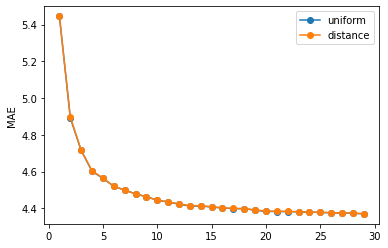

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

cv = KFold(n_splits = 10, shuffle = False) #


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train_ss):
          # División train test aleatoria
          f_train = train_ss.loc[train_fold]
          f_test = train_ss.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(["playResult"],axis=1), y = f_train['playResult'])
          y_pred = knn.predict(X = f_test.drop(['playResult'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['playResult'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_ss.drop(["playResult"],axis=1), train_ss["playResult"], test_size=0.2)

In [ ]:
# constructor
n_neighbors = 28
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)
mae = mean_absolute_error(y_test,y_pred)
print ('MAE', mae)

MAE 4.382557312469224


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



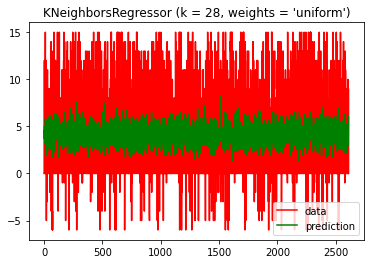

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

###Decision Trees

In [ ]:
train_ss = pd.DataFrame(X_pca_ss)
train_ss["playResult"] = static_defenses_ss["playResult"].values
train_ss.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,playResult
0,-0.415502,-2.604525,0.398728,1.726699,2.305911,-0.213223,-1.090411,1.967734,1.127472,1.671494,4.006159,-2.028701,-0.753478,0.525856,10
1,0.267848,-1.939551,1.451123,-0.306451,-0.510890,0.612115,-1.880438,0.440569,0.205356,-0.279999,-0.538184,0.287867,-0.456872,0.382741,0
2,2.570961,-2.396788,-3.262322,1.687738,0.539186,-0.462604,-0.255875,-0.186842,-2.073579,3.371101,-1.251161,-0.167971,-0.004674,-0.238315,0
3,-2.009085,0.869559,0.698198,-0.862215,1.990221,-1.921175,-0.652374,0.757219,-0.961236,-0.195996,0.595881,-0.373970,0.554268,-0.759374,4
4,0.440371,-0.044650,-2.522695,-0.159909,0.955513,2.316975,0.415287,-0.594723,-0.219956,-1.020116,-0.673888,0.112258,-0.286509,-0.454648,0


No handles with labels found to put in legend.


Min Value  :4.341451321120332 (1)


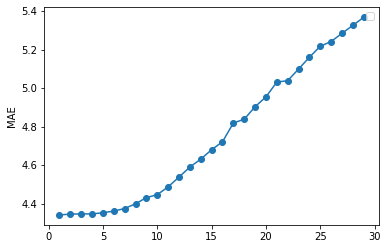

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 10, shuffle = False) #
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 


total_scores = []
for i in range(1,30):
    fold_accuracy = []
    dt = DecisionTreeRegressor(max_depth=i)
    # verificar cada uno de los modelos con validación cruzada.
    for train_fold, test_fold in cv.split(train_ss):
      # División train test aleatoria
      f_train = train_ss.loc[train_fold]
      f_test = train_ss.loc[test_fold]
      # entrenamiento y ejecución del modelo
      dt.fit( X = f_train.drop(['playResult'], axis=1), 
                            y = f_train['playResult'])
      y_pred = dt.predict(X = f_test.drop(['playResult'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['playResult'], y_pred)
      fold_accuracy.append(mae)
    total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value  :' +  str(min(total_scores)) +' (' + str(np.argmin(total_scores) + 1) + ')')
plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_ss.drop(["playResult"],axis=1),train_ss["playResult"],test_size=0.1)

In [ ]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit( X = X_train, y = y_train)
y_pred = regressor.predict(X = X_test)
mae = mean_absolute_error(y_test, y_pred)
print ('MAE', mae)


MAE 4.235372492140747


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



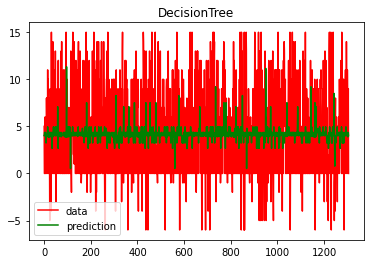

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree")

plt.show()

###RandomForest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_ss.drop(["playResult"],axis=1),train_ss["playResult"],test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 100, max_depth = 10, criterion='mae', random_state=0)
#1.2 Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("Error Measure ",  mae)

Error Measure  1.2536902223575999


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



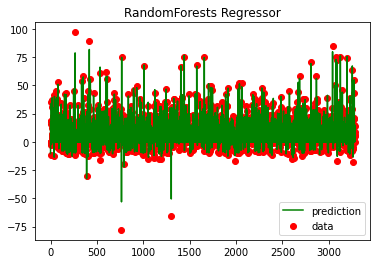

In [ ]:
#plt.subplot(2, 1, i + 1)
# x axis for plotting
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

##Sin incluir cluster en el pca (aparte)

###Normalización del dataset

In [ ]:
scaler = preprocessing.StandardScaler()
static_defenses1 = scaler.fit_transform(static_defenses_ss.drop(["playResult","cluster"],axis=1))

In [ ]:
pca_ss = PCA ()
X_pca_ss = pca_ss.fit_transform(static_defenses1)
X_pca_ss.shape

(16415, 35)

In [ ]:
exp_var_cumul = np.cumsum(pca_ss.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
X_pca_ss = PCA(n_components = 14).fit_transform(static_defenses1)
X_pca_ss.shape

(16415, 14)

In [ ]:
train_ss = pd.DataFrame(X_pca_ss)
train_ss["cluster"] = static_defenses_ss["cluster"].values
train_ss["playResult"] = static_defenses_ss["playResult"].values
train_ss.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,cluster,playResult
0,-0.774207,-2.468463,0.494566,1.864442,2.134127,-0.167691,-1.035524,2.170307,1.481360,1.282108,-4.053163,1.791270,-0.521984,0.693607,2,3
1,-0.050022,-1.812451,1.506638,-0.269917,-0.550293,0.652476,-1.825972,0.446371,0.143674,-0.281564,0.558414,-0.310548,-0.510450,0.446732,2,1
2,2.290472,-2.538432,-3.218413,1.618976,0.525982,-0.480004,-0.323773,-0.103402,-1.648392,3.647436,0.568315,-0.831423,0.013315,-0.263234,2,1
3,-1.455413,-1.673324,2.751002,-1.874452,0.495802,-0.928747,-0.089101,1.235334,-0.949320,-0.706386,0.283100,-0.117369,-0.609669,0.547709,0,4
4,-1.647651,0.858845,0.729530,-0.845751,2.025989,-1.865084,-0.695297,0.816664,-0.857213,-0.145107,-0.575783,0.279942,0.620701,-0.725169,0,2


###KNN

Max Value uniform : 0.312640877246421 (28)
Max Value distance : 0.3062442887602802 (29)


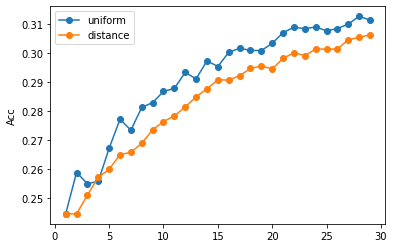

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

cv = KFold(n_splits = 5, shuffle = False) #


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train_ss):
          # División train test aleatoria
          f_train = train_ss.loc[train_fold]
          f_test = train_ss.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(["playResult"],axis=1), y = f_train['playResult'])
          y_pred = knn.predict(X = f_test.drop(['playResult'], axis = 1))
          # evaluación del modelo
          acc = accuracy_score(f_test['playResult'], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc')   
    

plt.legend()
plt.show() 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_ss.drop(["playResult"],axis=1), train_ss["playResult"], test_size=0.2)

In [ ]:
# constructor
n_neighbors = 27
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)
acc = accuracy_score(y_test, y_pred)
print ('Acc', acc)

Acc 0.3170880292415474


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):
  
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.01056338 0.6971831  0.04577465 0.21478873 0.03169014]
 [0.00276243 0.67034991 0.04051565 0.24033149 0.04604052]
 [0.00642398 0.65738758 0.04710921 0.25267666 0.03640257]
 [0.00323625 0.6429342  0.03883495 0.28047465 0.03451996]
 [0.01541426 0.65510597 0.03853565 0.23699422 0.0539499 ]]


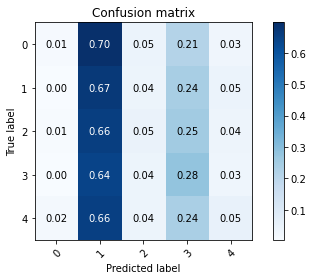

In [ ]:
plot_confusion_matrix(y_test, y_pred, classes=unique_labels(y_test,y_pred), normalize=True,
                      title='Confusion matrix')

###Decision Trees

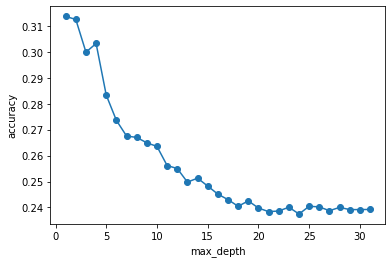

In [ ]:
from sklearn import tree
from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, shuffle = False) # 
accuracies = list()
max_attributes = len(list(train_ss))
depth_range = range(1, max_attributes * 2)

# from 1 to number of features * 2

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy', 
                                             min_samples_split = 65, 
                                             min_samples_leaf = 20,
                                             max_depth = depth,
                                             class_weight={0:3.28}
                                            )
    for train_fold, test_fold in cv.split(train_ss):
        f_train = train_ss.loc[train_fold]
        f_test = train_ss.loc[test_fold]
        
        model = tree_model.fit( X = f_train.drop(['playResult'], axis=1), 
                               y = f_train['playResult'])
        test_acc = model.score(X = f_test.drop(['playResult'], axis=1), 
                                y = f_test['playResult'])
        fold_accuracy.append(test_acc)
        
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
import matplotlib.pyplot as plt    
plt.plot(depth_range, accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_ss.drop(["playResult"],axis=1),train_ss["playResult"],test_size=0.2)

In [ ]:
regressor = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = 65, 
                                  min_samples_leaf = 20, max_depth = 8, 
                                  class_weight={0:3.28})
regressor.fit( X = X_train, y = y_train)
y_pred = regressor.predict(X = X_test)
acc = accuracy_score(y_test, y_pred)
print ('Acc', acc)


Acc 0.2576911361559549


Normalized confusion matrix
[[0.34736842 0.62807018 0.00350877 0.01754386 0.00350877]
 [0.32136602 0.617338   0.00350263 0.04903678 0.00875657]
 [0.324      0.612      0.004      0.052      0.008     ]
 [0.30528846 0.640625   0.00360577 0.04206731 0.00841346]
 [0.33396947 0.61450382 0.0019084  0.04007634 0.00954198]]


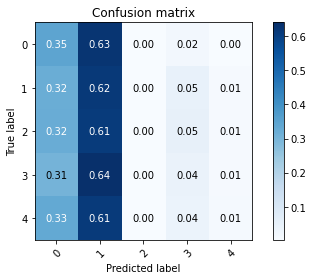

In [ ]:
plot_confusion_matrix(y_test, y_pred, classes=unique_labels(y_test,y_pred), normalize=True,
                      title='Confusion matrix')

###RamdomForest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_ss.drop(["playResult"],axis=1),train_ss["playResult"],test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 100, max_depth = 10, criterion='mae', random_state=0)
#1.2 Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("Error Measure ",  mae)

Error Measure  7.629689308559244


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



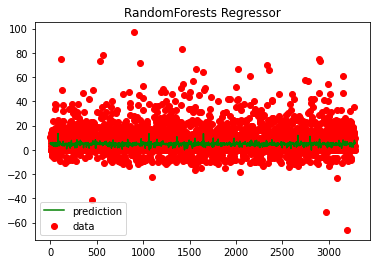

In [ ]:
#plt.subplot(2, 1, i + 1)
# x axis for plotting
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

#MinMaxScaler

##Incluyendo cluster en el pca

##Sin incluir cluster en el pca (aparte)

###Normalización del dataset

In [ ]:
scaler = preprocessing.MinMaxScaler()
static_defenses2 = scaler.fit_transform(static_defenses_mms.drop(["playResult","cluster"],axis=1))

In [ ]:
pca_ss = PCA ()
X_pca_mms = pca_ss.fit_transform(static_defenses2)
X_pca_mms.shape

(13055, 35)

In [ ]:
exp_var_cumul = np.cumsum(pca_ss.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
X_pca_mms = PCA(n_components = 8).fit_transform(static_defenses2)
X_pca_mms.shape

(13055, 8)

In [ ]:
train_mms = pd.DataFrame(X_pca_mms)
train_mms["cluster"] = static_defenses_mms["cluster"].values
train_mms["playResult"] = static_defenses_mms["playResult"].values
train_mms.head()

,0,1,2,3,4,5,6,7,cluster,playResult
0,-0.796755,-2.471072,0.379017,1.882375,2.238831,-0.252902,-1.073809,1.942712,0,10
1,-0.073679,-1.840974,1.472944,-0.208072,-0.519359,0.596660,-1.867148,0.427152,2,0
2,2.280850,-2.498067,-3.337572,1.541704,0.509576,-0.472374,-0.258515,-0.187897,0,0
3,-1.676255,0.859091,0.704645,-0.888400,2.034823,-1.884758,-0.673737,0.781324,6,4
4,0.181144,0.085049,-2.480629,-0.072058,0.943940,2.317139,0.425749,-0.599257,1,0


###Sin normalización

In [ ]:
train_mms = static_defenses_mms
train_mms.reset_index(drop=True,inplace=True)
train_mms.head()

,defensivelinezonePlayers,deepzonePlayers,hookzonePlayers,curlzonePlayers,flatzonePlayers,defenseArea,defenseAreaCoverDefenders,width,height,numberQBs,numberWRs,numberTEs,numberRBs,numberFBs,numberOffensivePlayersAnotherPosition,numberSafeties,numberLBs,numberCBs,strongSide,numberPlayersDefenseStrongSide,numberPlayersDefenseWeakSide,numberPlayersOffenseStrongSide,numberPlayersOffenseWeakSide,differenceOffenseVsDefenseWidth,differenceOffenseVsDefenseStrongSide,differenceOffenseVsDefenseWeakSide,HeightByWeightDeep,HeightByWeightHook,HeightByWeightCurl,HeightByWeightFlat,WeightByArea,density,densityNoLine,densityInsidePoints,densityInsidePointsNoLine,cluster,playResult
0,0,1,3,2,1,194.31095,194.31095,22.96,15.25,1,2,1,1,1,0,3,2,2,1,3,4,3,2,-0.63,0,-2,0.020227,0.018643,0.020066,0.021034,3.376032,0.036025,0.036025,6.974268,6.974268,0,10
1,0,1,3,2,1,204.17725,204.17725,29.22,12.57,1,3,1,1,0,0,2,2,3,0,3,4,2,3,-1.15,-1,-1,0.020227,0.019228,0.020356,0.020455,3.178611,0.034284,0.034284,6.975511,6.975511,2,0
2,0,1,2,2,2,277.65495,277.65495,33.67,15.21,1,2,1,2,0,0,2,2,3,1,5,2,4,1,0.71,-1,-1,0.020227,0.017683,0.020997,0.020745,2.337434,0.025211,0.025211,6.985594,6.985594,0,0
3,1,0,3,3,1,187.12510,153.20020,27.80,13.29,1,3,1,1,0,0,2,3,3,1,3,5,3,2,-4.82,0,-3,0.000000,0.018995,0.019537,0.021279,4.281979,0.042752,0.045692,7.978624,7.980418,6,4
4,1,0,3,2,2,216.25455,215.80350,36.24,11.79,1,2,2,1,0,0,2,3,3,0,5,3,3,2,-0.36,-2,-1,0.000000,0.018343,0.019688,0.021235,3.039802,0.036993,0.032437,7.972255,7.976831,1,0


###KNN

Min Value uniform : 4.369945975332202 (29)
Min Value distance : 4.371092347760859 (29)


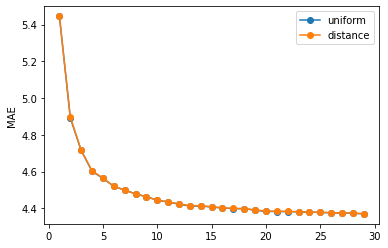

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

cv = KFold(n_splits = 10, shuffle = False) #


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train_mms):
          # División train test aleatoria
          f_train = train_ss.loc[train_fold]
          f_test = train_ss.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(["playResult"],axis=1), y = f_train['playResult'])
          y_pred = knn.predict(X = f_test.drop(['playResult'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['playResult'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_mms.drop(["playResult"],axis=1), train_mms["playResult"], test_size=0.15)

In [ ]:
# constructor
n_neighbors = 29
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)
mae = mean_absolute_error(y_test,y_pred)
print ('MAE', mae)

MAE 4.392899262466775


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



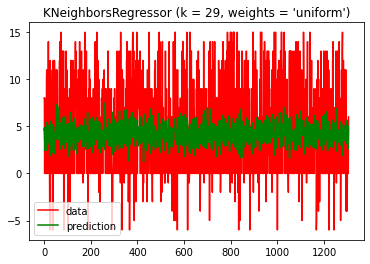

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

###Decision Trees

No handles with labels found to put in legend.


Min Value  :4.341451321120332 (1)


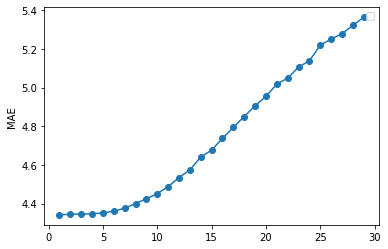

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 10, shuffle = False) #
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 


total_scores = []
for i in range(1,30):
    fold_accuracy = []
    dt = DecisionTreeRegressor(max_depth=i)
    # verificar cada uno de los modelos con validación cruzada.
    for train_fold, test_fold in cv.split(train_mms):
      # División train test aleatoria
      f_train = train_ss.loc[train_fold]
      f_test = train_ss.loc[test_fold]
      # entrenamiento y ejecución del modelo
      dt.fit( X = f_train.drop(['playResult'], axis=1), 
                            y = f_train['playResult'])
      y_pred = dt.predict(X = f_test.drop(['playResult'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['playResult'], y_pred)
      fold_accuracy.append(mae)
    total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value  :' +  str(min(total_scores)) +' (' + str(np.argmin(total_scores) + 1) + ')')
plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_mms.drop(["playResult"],axis=1),train_mms["playResult"],test_size=0.15)

In [ ]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit( X = X_train, y = y_train)
y_pred = regressor.predict(X = X_test)
mae = mean_absolute_error(y_test, y_pred)
print ('MAE', mae)


MAE 4.413570938077481


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



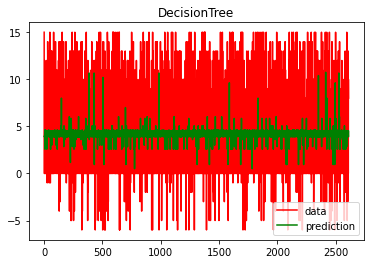

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree")

plt.show()

###RamdomForest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_mms.drop(["playResult"],axis=1),train_mms["playResult"],test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 100, max_depth = 10, criterion='mae', random_state=0)
#1.2 Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("Error Measure ",  mae)

Error Measure  7.682313432835821


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



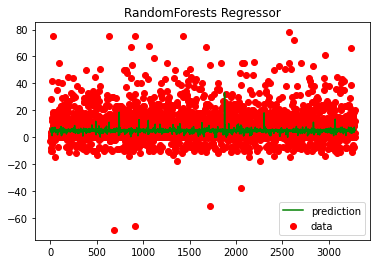

In [ ]:
#plt.subplot(2, 1, i + 1)
# x axis for plotting
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

#RobustScaler

##Incluyendo cluster en el pca

##Sin incluir cluster en el pca (aparte)

###Normalización del dataset

In [ ]:
scaler = preprocessing.RobustScaler()
static_defenses3 = scaler.fit_transform(static_defenses_rs.drop(["playResult","cluster"],axis=1))

In [ ]:
pca_rs = PCA ()
X_pca_rs = pca_rs.fit_transform(static_defenses2)
X_pca_rs.shape

(13055, 35)

In [ ]:
exp_var_cumul = np.cumsum(pca_rs.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
X_pca_rs = PCA(n_components = 8).fit_transform(static_defenses3)
X_pca_rs.shape

(13055, 8)

In [ ]:
train_rs = pd.DataFrame(X_pca_rs)
train_rs["cluster"] = static_defenses_rs["cluster"].values
train_rs["playResult"] = static_defenses_rs["playResult"].values
train_rs.head()

,0,1,2,3,4,5,6,7,cluster,playResult
0,-3.086540,-1.245079,0.775700,-1.588382,-0.322694,-1.144379,-1.030578,-1.295211,0,10
1,-2.772962,-1.547817,0.375283,-1.358169,-0.976733,-0.929058,0.919315,-0.066047,0,0
2,-3.498090,-0.020386,-1.007403,-1.610834,-1.709207,2.113304,-1.675500,-0.445066,0,0
3,-3.008134,-1.703868,1.541688,0.843385,0.263909,-2.112420,-1.214189,-0.445794,0,4
4,-3.542413,-0.924250,0.180198,0.599851,-0.141021,1.632405,-0.021655,-0.785646,0,0


###KNN

Min Value uniform : 4.377754751235039 (29)
Min Value distance : 4.378160734828406 (29)


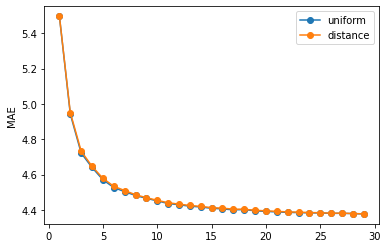

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

cv = KFold(n_splits = 10, shuffle = False) #


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train_rs):
          # División train test aleatoria
          f_train = train_ss.loc[train_fold]
          f_test = train_ss.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(["playResult"],axis=1), y = f_train['playResult'])
          y_pred = knn.predict(X = f_test.drop(['playResult'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['playResult'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_rs.drop(["playResult"],axis=1), train_rs["playResult"], test_size=0.2)

In [ ]:
# constructor
n_neighbors = 29
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)
mae = mean_absolute_error(y_test,y_pred)
print ('MAE', mae)

MAE 4.381766795652346


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



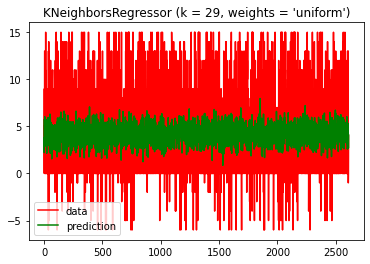

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

###Decision Trees

No handles with labels found to put in legend.


Min Value  :4.352378349329421 (3)


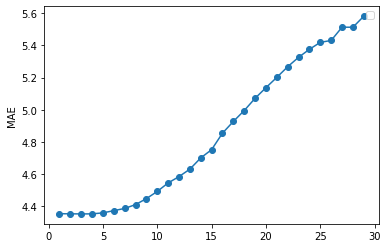

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 10, shuffle = False) #
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 


total_scores = []
for i in range(1,30):
    fold_accuracy = []
    dt = DecisionTreeRegressor(max_depth=i)
    # verificar cada uno de los modelos con validación cruzada.
    for train_fold, test_fold in cv.split(train_rs):
      # División train test aleatoria
      f_train = train_ss.loc[train_fold]
      f_test = train_ss.loc[test_fold]
      # entrenamiento y ejecución del modelo
      dt.fit( X = f_train.drop(['playResult'], axis=1), 
                            y = f_train['playResult'])
      y_pred = dt.predict(X = f_test.drop(['playResult'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['playResult'], y_pred)
      fold_accuracy.append(mae)
    total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value  :' +  str(min(total_scores)) +' (' + str(np.argmin(total_scores) + 1) + ')')
plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_rs.drop(["playResult"],axis=1),train_rs["playResult"],test_size=0.2)

In [ ]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit( X = X_train, y = y_train)
y_pred = regressor.predict(X = X_test)
mae = mean_absolute_error(y_test, y_pred)
print ('MAE', mae)


MAE 4.3345387442252905


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



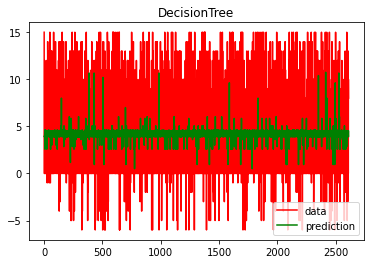

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree")

plt.show()

###RamdomForest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_mms.drop(["playResult"],axis=1),train_mms["playResult"],test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 100, max_depth = 10, criterion='mae', random_state=0)
#1.2 Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("Error Measure ",  mae)

Error Measure  7.682313432835821


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



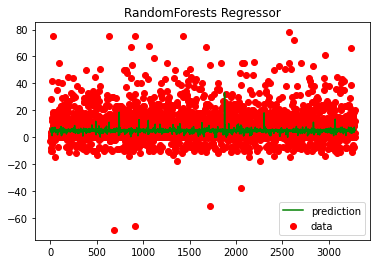

In [ ]:
#plt.subplot(2, 1, i + 1)
# x axis for plotting
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

#PowerTransformer